In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
ang = 60.*np.pi/180.
w = np.pi/180.
x0 = [0.,np.cos(ang),1.]
y0 = [0.,np.sin(ang),0.]

In [3]:
def spins(angulo):
    ex = [-np.cos((30.+angulo)*w),np.cos((90.+angulo)*w),-np.cos((150.+angulo)*w)]
    ey = [-np.sin((30.+angulo)*w),np.sin((90.+angulo)*w),-np.sin((150.+angulo)*w)]
    return ex,ey

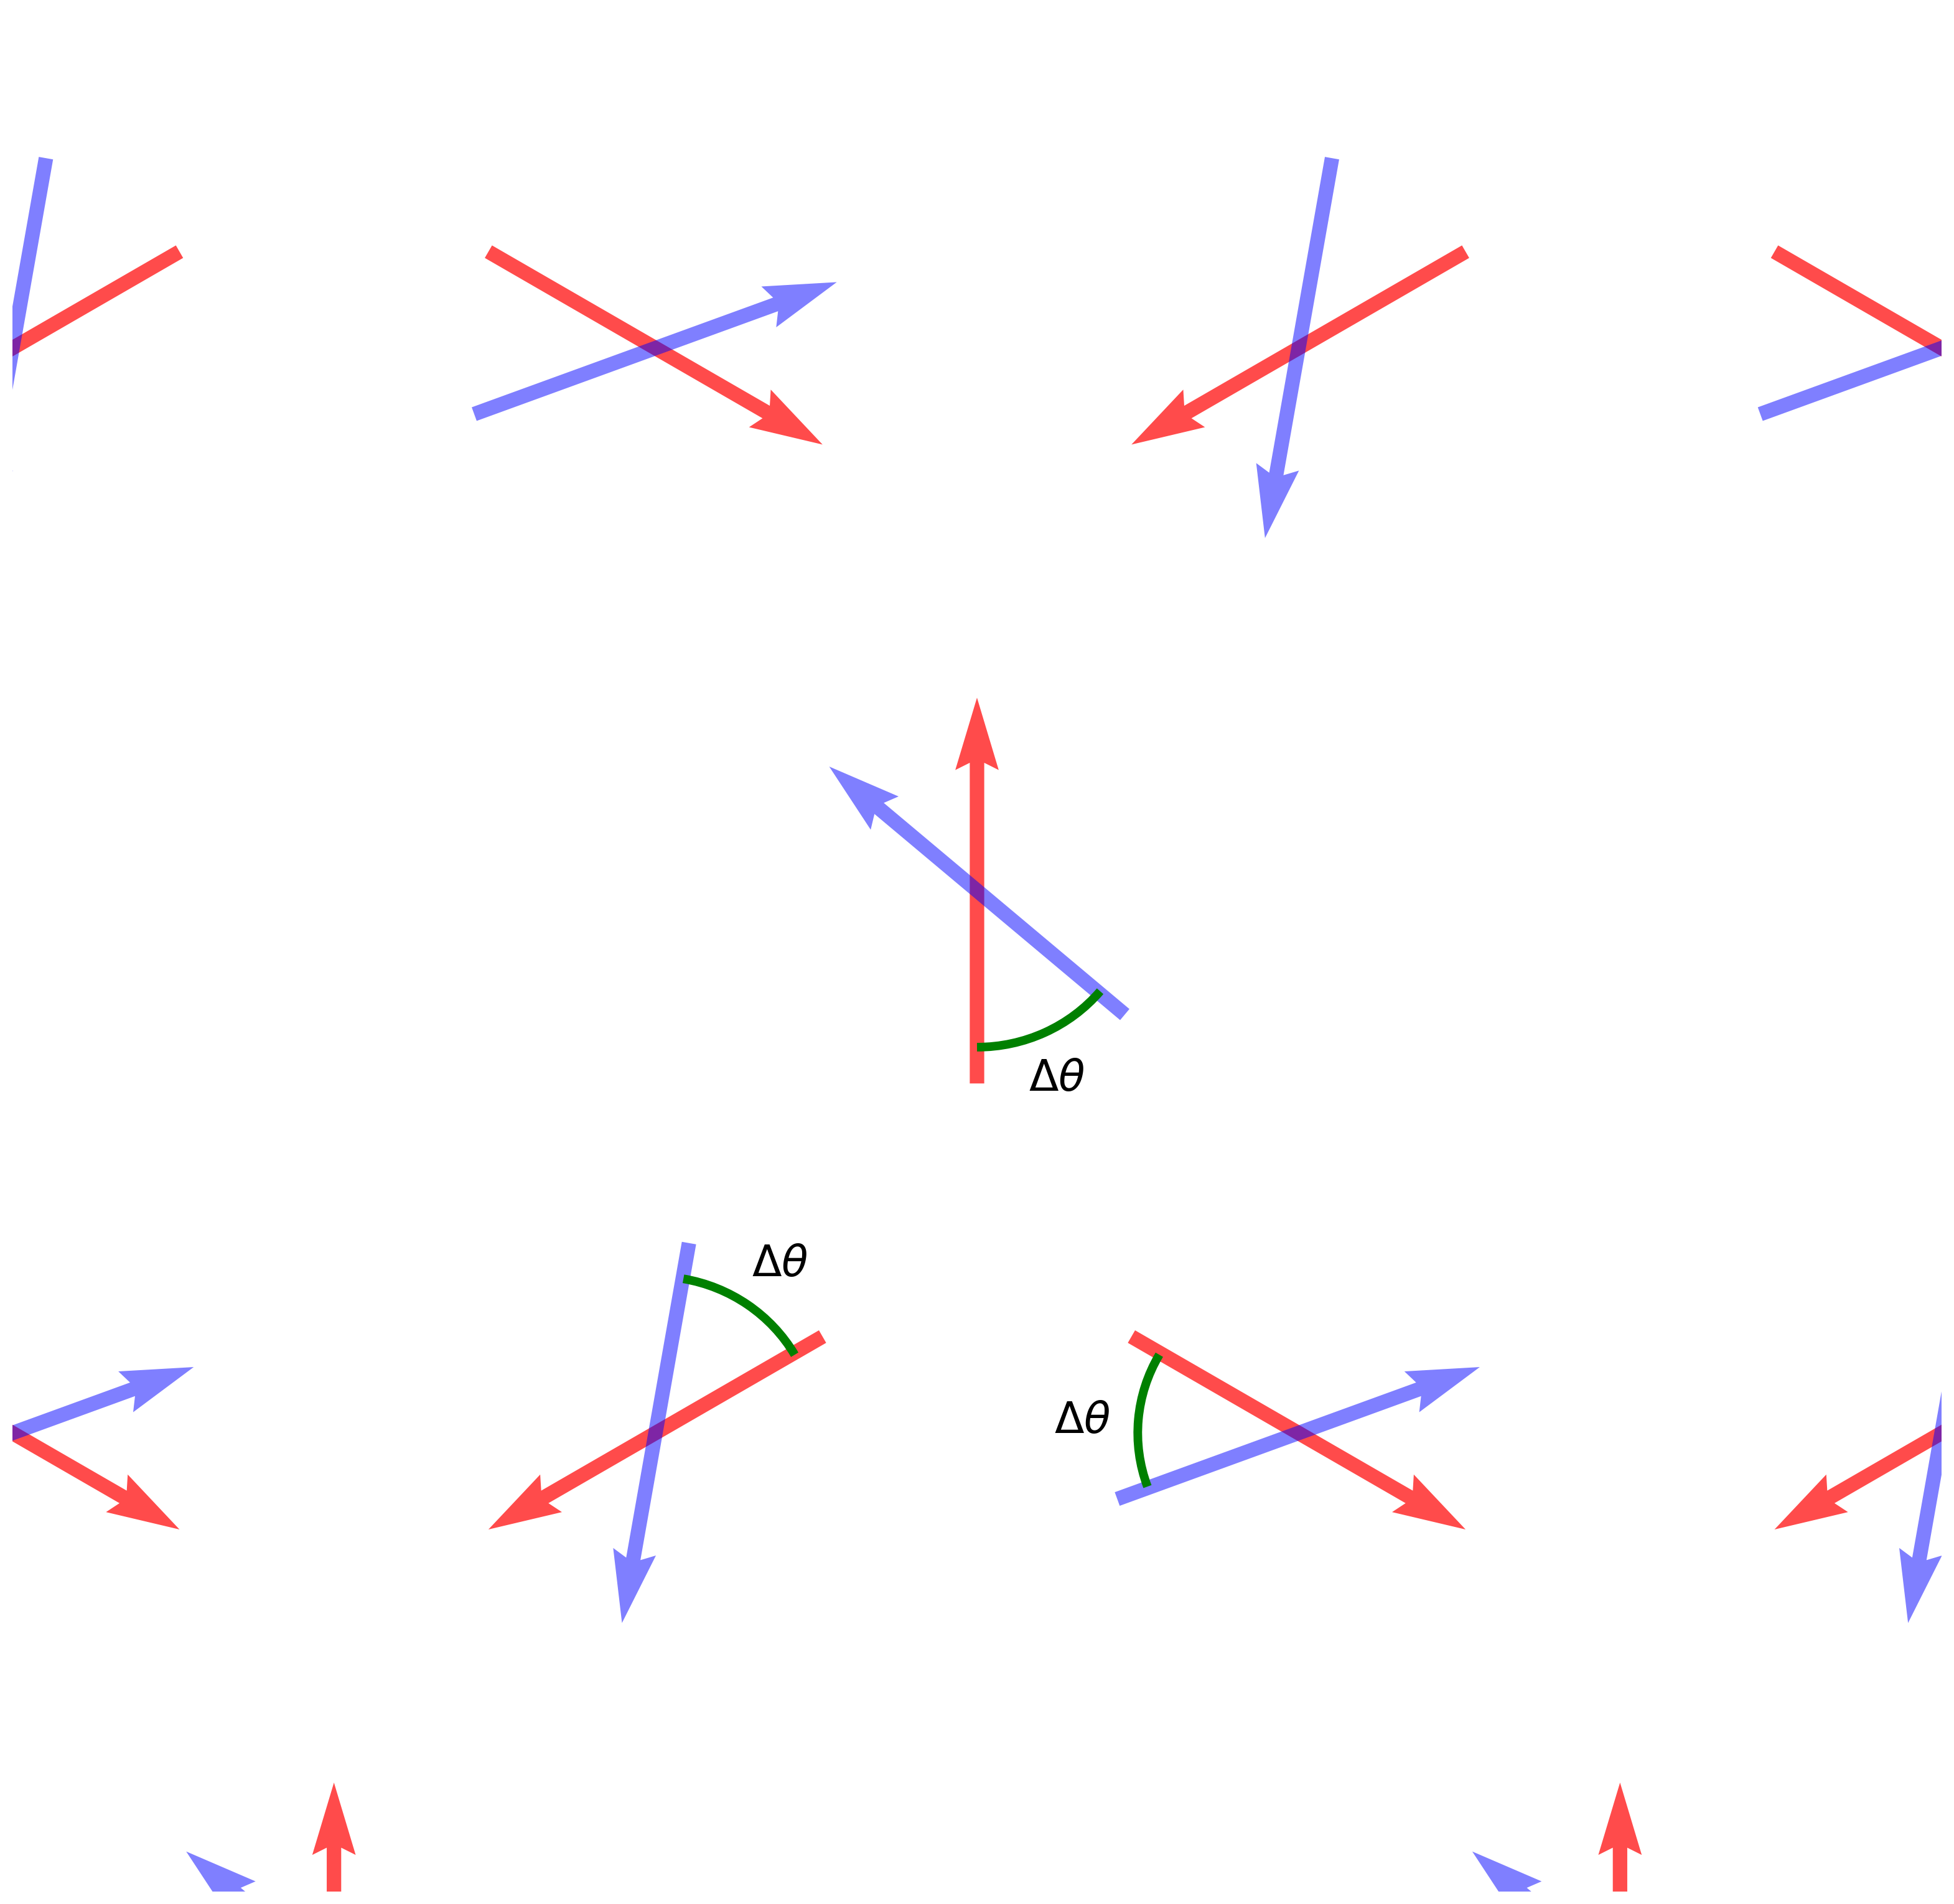

In [97]:
import matplotlib
Arc = matplotlib.patches.Arc

x = []
y = []
mx0 = []
my0 = []

mx1 = []
my1 = []

nx = 4
ny = 4

ex,ey = spins(0.)

for j in range(ny):
    for i in range(nx):
        for k in range(3):
            x.append(x0[k]+2.*(i)+j%2)
            y.append(y0[k]+2.*np.sin(ang)*j)
            mx0.append(ex[k])
            my0.append(ey[k])
            
x = []
y = []
ex,ey = spins(50.)

for j in range(ny):
    for i in range(nx):
        for k in range(3):
            x.append(x0[k]+2.*(i)+j%2)
            y.append(y0[k]+2.*np.sin(ang)*j)
            mx1.append(ex[k])
            my1.append(ey[k])

        
fig = plt.figure(figsize=(20,20),dpi = 200)
ax = fig.add_subplot(111, aspect='auto')
plt.box(False)
plt.axis('off')
plt.quiver(x,y,mx0,my0,pivot='middle',scale=5,color='red',alpha=0.7)
plt.quiver(x,y,mx1,my1,pivot='middle',scale=5,color='blue',alpha=0.5)

arc1 = Arc([x[15],y[15]],0.5,0.5,angle=0.,theta1=30.,theta2=80.,lw=5,color = 'g')
arc2 = Arc([x[16],y[16]],0.5,0.5,angle=180.,theta1=90.,theta2=140.,lw=5,color = 'g')
arc3 = Arc([x[17],y[17]],0.5,0.5,angle=0.,theta1=150.,theta2=200.,lw=5,color = 'g')
ax.add_artist(arc1)
ax.add_artist(arc2)
ax.add_artist(arc3)
plt.text(x[15]+0.15,y[15]+0.25,'$\\Delta \\theta$',fontsize=25)
plt.text(x[16]+0.08,y[16]-0.32,'$\\Delta \\theta$',fontsize=25)
plt.text(x[17]-0.38,y[17],'$\\Delta \\theta$',fontsize=25)

plt.xlim(2,5)
plt.ylim(1,4)

plt.savefig('kagome.pdf',dpi=200)

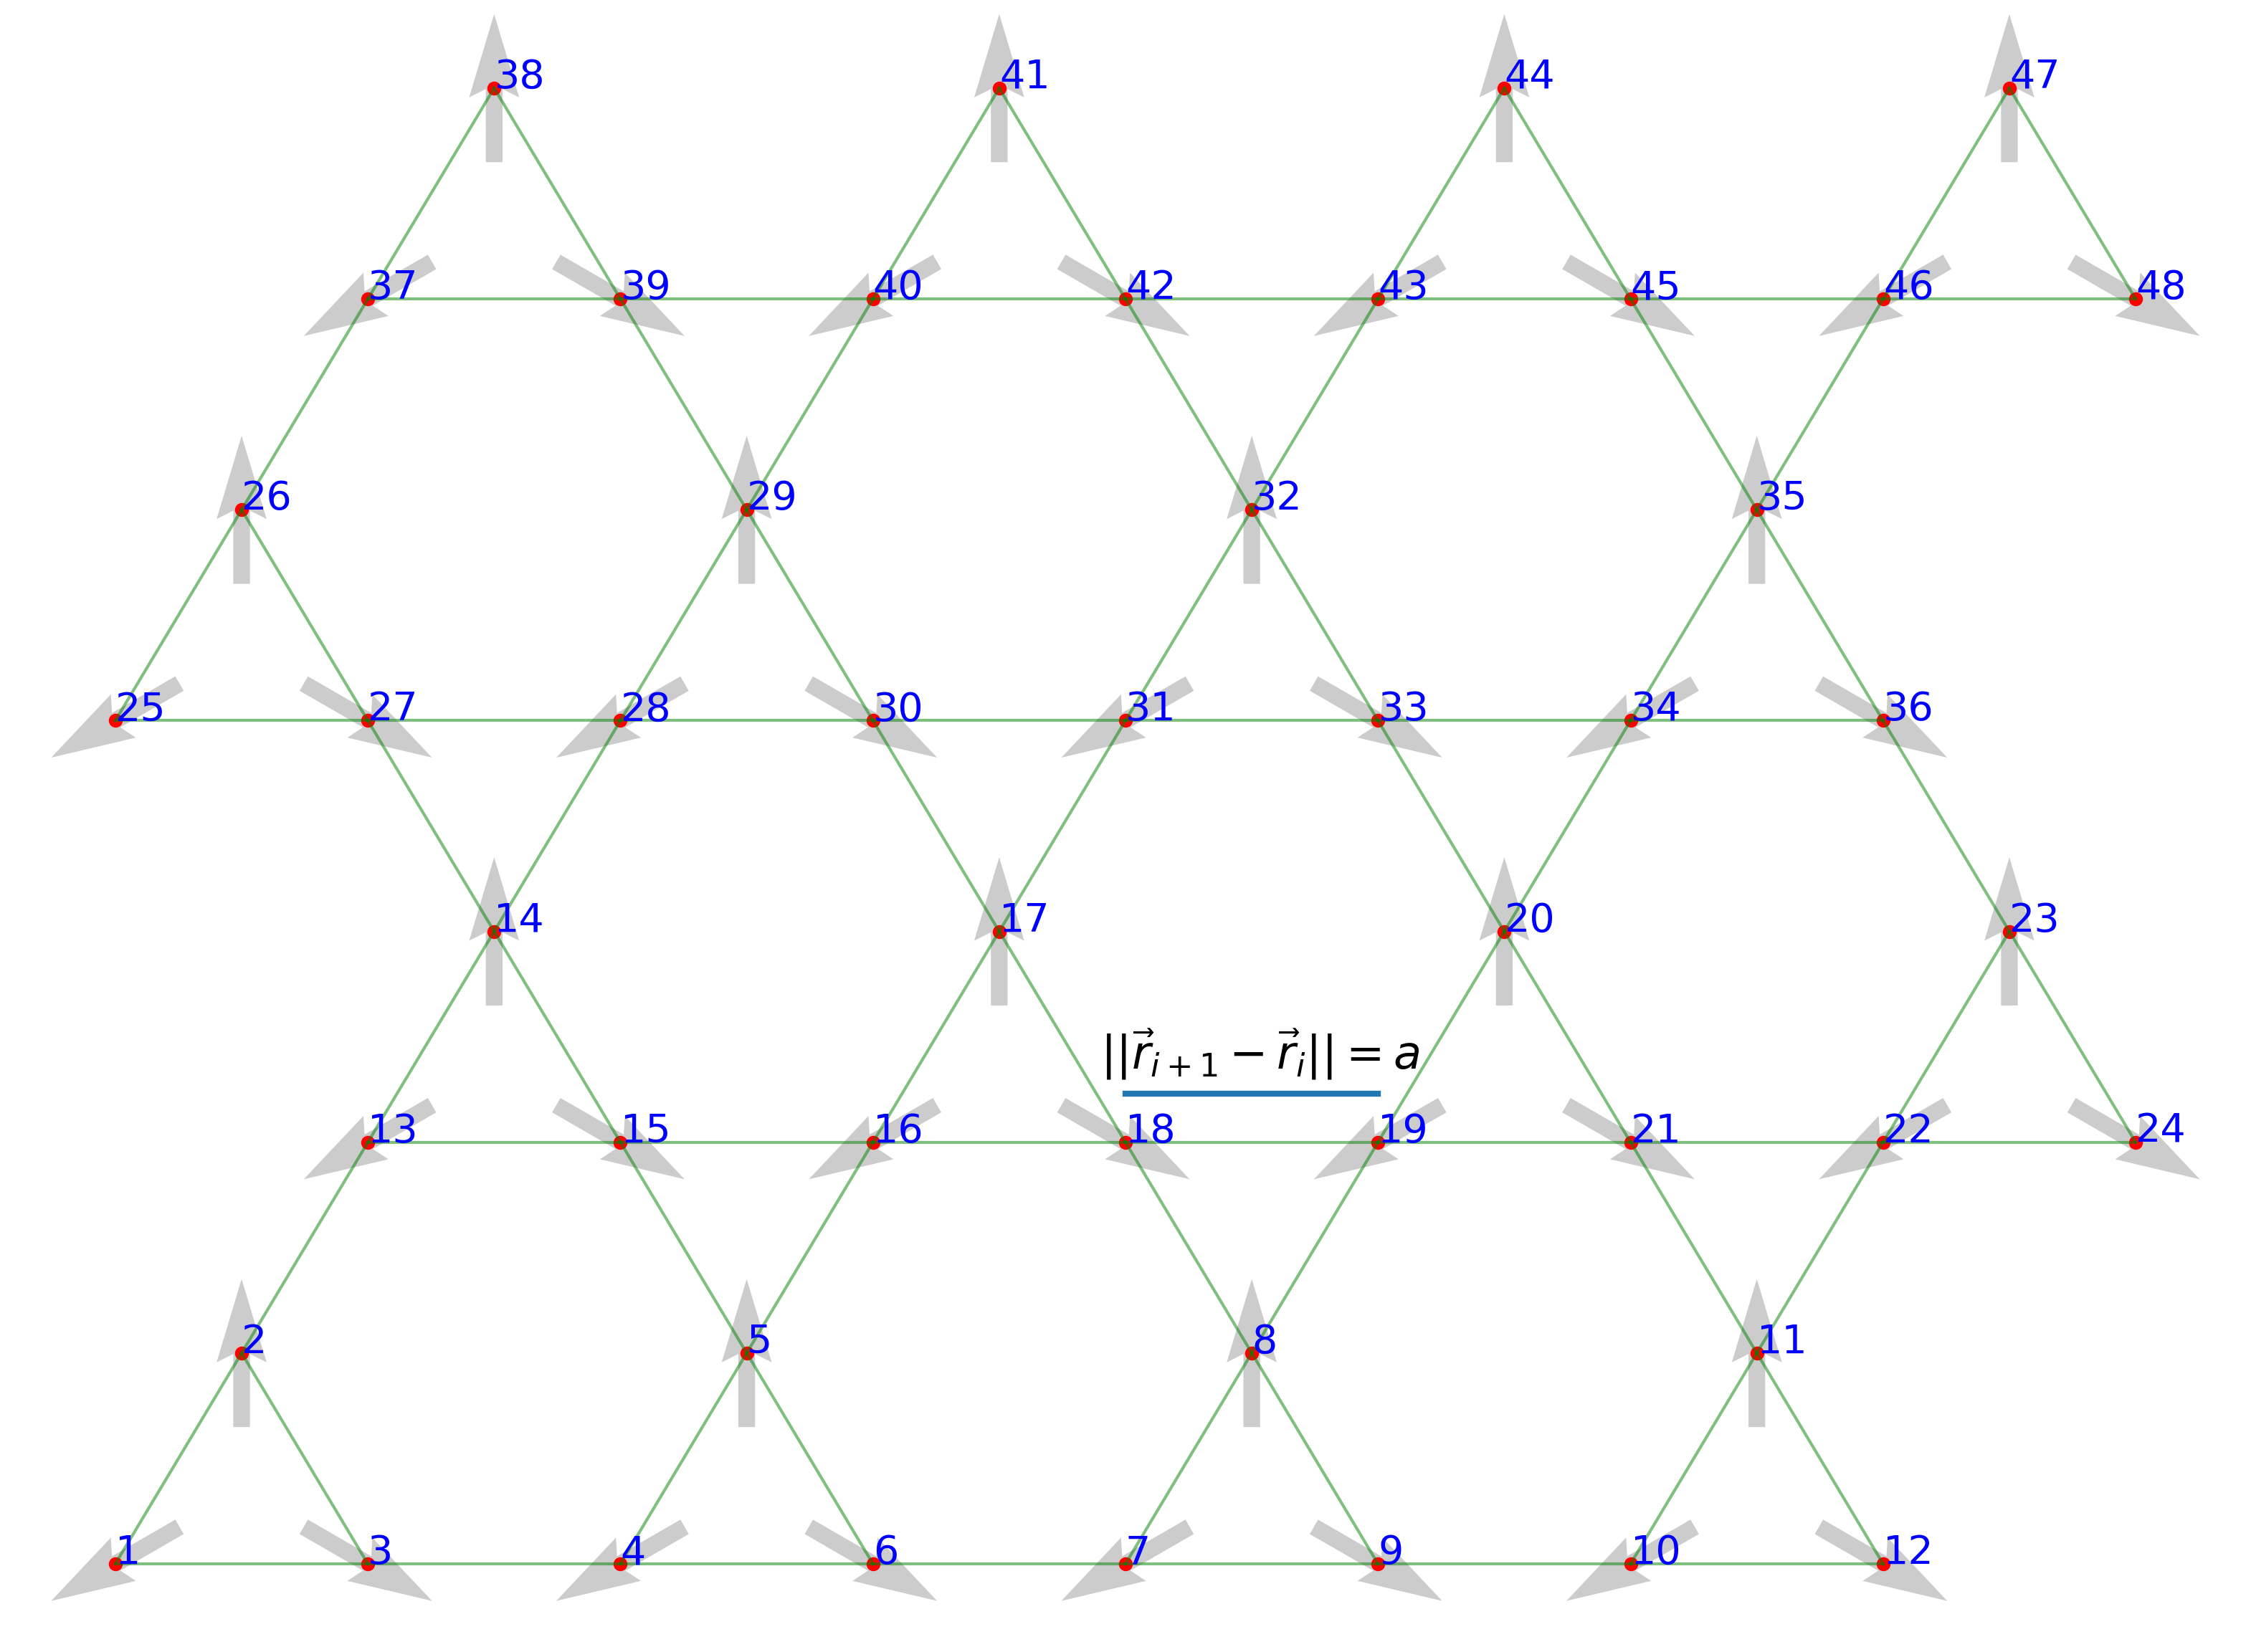

In [79]:
x = []
y = []
mx = []
my = []

ex,ey = spins(0.)

for j in range(ny):
    for i in range(nx):
        for k in range(3):
            x.append(x0[k]+2.*(i)+j%2)
            y.append(y0[k]+2.*np.sin(ang)*j)
            mx.append(ex[k])
            my.append(ey[k])

plt.figure(figsize=(20,15),dpi = 200)
#plt.box(False)
plt.axis('off')
plt.quiver(x,y,mx,my,pivot='middle',scale=15,alpha=0.2)
plt.scatter(x,y,marker='o',c='r')
for i in range(np.size(x)):
    plt.text(x[i],y[i],str(i+1),fontsize=20,c='b')

for i in range(0,np.size(x)-1):
    for j in range(i+1,np.size(x)):
        dx = x[i]-x[j]
        dy = y[i]-y[j]
        dist = np.sqrt(dx**2 + dy**2)
        if dist > 0.9 and dist < 1.1:
            plt.plot([x[i],x[j]],[y[i],y[j]],c='g',alpha=0.5)

plt.text(x[18]-1.1,y[18]+0.3,'$|| \\vec{r}_{i+1}-\\vec{r}_i ||=a$',fontsize=23)
plt.plot([x[17],x[18]],[y[17]+0.2,y[18]+0.2],lw=3)
plt.savefig('rede.pdf',dpi=200)

# Hamiltoniano de interação

$\Large H_{<ij>}^{troca} = - J \vec{S}_{i} \cdot \vec{S}_j$

$\Large H_{ij}^{dip} = \frac{D}{r_{ij}^3}[\vec{S}_i \cdot \vec{S}_j - 3(\vec{S}_i \cdot \hat{r}_{ij})(\vec{S}_j \cdot \hat{r}_{ij})]$

$\Large A_{ij} =- J \hat{e}_{i} \cdot \hat{e}_j + \frac{D}{r_{ij}^3}[\hat{e}_i \cdot \hat{e}_j - 3(\hat{e}_i \cdot \hat{r}_{ij})(\hat{e}_j \cdot \hat{r}_{ij})]$

$J = \frac{13 D}{2}$

$\Large A_{ij} =\left[ \frac{1}{r_{ij}^3} - \frac{13}{2} \right] (\hat{e}_{i} \cdot \hat{e}_j) - \frac{D}{r_{ij}^3}[3(\hat{e}_i \cdot \hat{r}_{ij})(\hat{e}_j \cdot \hat{r}_{ij})]$

$\LARGE H_{ij} = \sigma_i \sigma_j A_{ij}$

In [6]:
x = []
y = []
mx = []
my = []

nx = 12
ny = 12

ex,ey = spins(0.)

for j in range(ny):
    for i in range(nx):
        for k in range(3):
            x.append(x0[k]+2.*(i)+j%2)
            y.append(y0[k]+2.*np.sin(ang)*j)
            mx.append(ex[k])
            my.append(ey[k])


N_spin = np.size(x)
Aij = np.zeros([N_spin,N_spin])

Lx = max(x) - min(x)
Ly = max(y) - min(y) + np.sin(60.0*np.pi/180.0)

for i in range(N_spin):
    x[i] -= 0.5*Lx
    y[i] -= 0.5*Ly

rc = np.sqrt(Lx**2+Ly**2)

for i in range(N_spin):
    for nx in range(-2,3):
        for ny in range(-2,3):
            for j in range(N_spin):    
                A1 = 0.
                A2 = 0.
                dx = x[i]-x[j] + nx*Lx
                dy = y[i]-y[j] + ny*Ly
                dist = np.sqrt(dx**2 + dy**2)
                # Troca
                if (dist < 1.2 and dist > 0.5):
                    A1 = (mx[i]*mx[j] + my[i]*my[j])
                else:
                    A1 = 0.
                #Dipolar
                if (dist <= rc and dist > 0.5):
                    dx /= dist
                    dy /= dist
                    dist3 = 1/dist**3
                    A2 = ((mx[i]*mx[j] + my[i]*my[j]) - 3.*(mx[i]*dx+my[i]*dy)*(mx[j]*dx+my[j]*dy))*dist3 # (D)
                else:
                    A2 = 0.
                Aij[i,j] += -(13./2)*A1 + A2



In [7]:
Aij

array([[-2.01044842e-04,  5.00015998e+00,  5.00000685e+00, ...,
        -1.56413263e-01,  5.00015998e+00, -2.40562833e-01],
       [ 5.00015998e+00, -3.36521322e-04,  5.00015998e+00, ...,
         6.49693148e-02, -1.56579798e-01,  2.52544006e-02],
       [ 5.00000685e+00,  5.00015998e+00, -2.01044842e-04, ...,
         2.50747576e-02, -2.40396108e-01,  1.24823899e-01],
       ...,
       [-1.56413263e-01,  6.49693148e-02,  2.50747576e-02, ...,
        -2.01044842e-04,  5.00015998e+00,  5.00000685e+00],
       [ 5.00015998e+00, -1.56579798e-01, -2.40396108e-01, ...,
         5.00015998e+00, -3.36521322e-04,  5.00015998e+00],
       [-2.40562833e-01,  2.52544006e-02,  1.24823899e-01, ...,
         5.00000685e+00,  5.00015998e+00, -2.01044842e-04]])

# Calcular B_i

$\LARGE B_i = \sum_{j} S_j A_{ij}$

In [414]:
Bi = np.zeros(N_spin)
S = [1]*N_spin
for i in range(N_spin):
    for j in range(N_spin):
        Bi[i] += S[j]*Aij[i,j]
Bi

array([18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93303458,
       18.93303458, 18.93303458, 18.93303458, 18.93303458, 18.93

# Calcular Energia

$\LARGE E_i = S_i B_i$

$\LARGE \Delta E = -2 S_i B_i$

# Atualizar B_i

$\LARGE \Delta B_i[j] = -2 S_i A_{ij}$

$\LARGE B_i[j] = B_i[j] + \Delta B_i[j]$

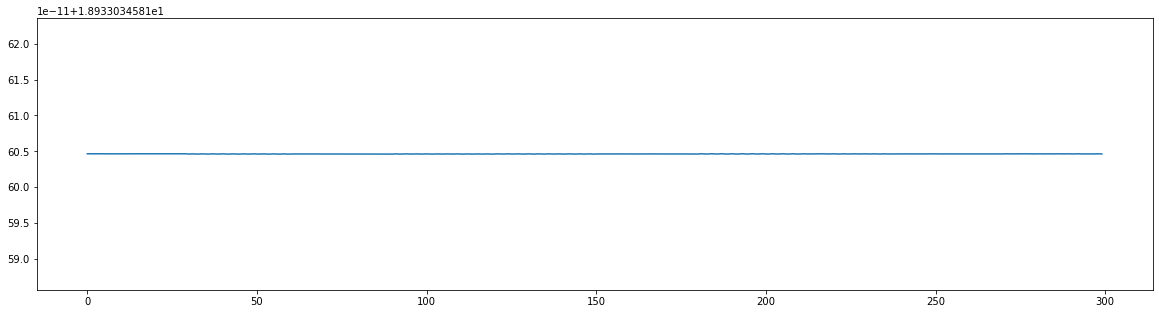

In [415]:
def update(i):
    for j in range(N_spin):
        Bi[j] += -2*S[i]*Aij[j,i]
    
    S[i] = -S[i]
    return

plt.figure(figsize=(20,5))
plt.plot(Bi)

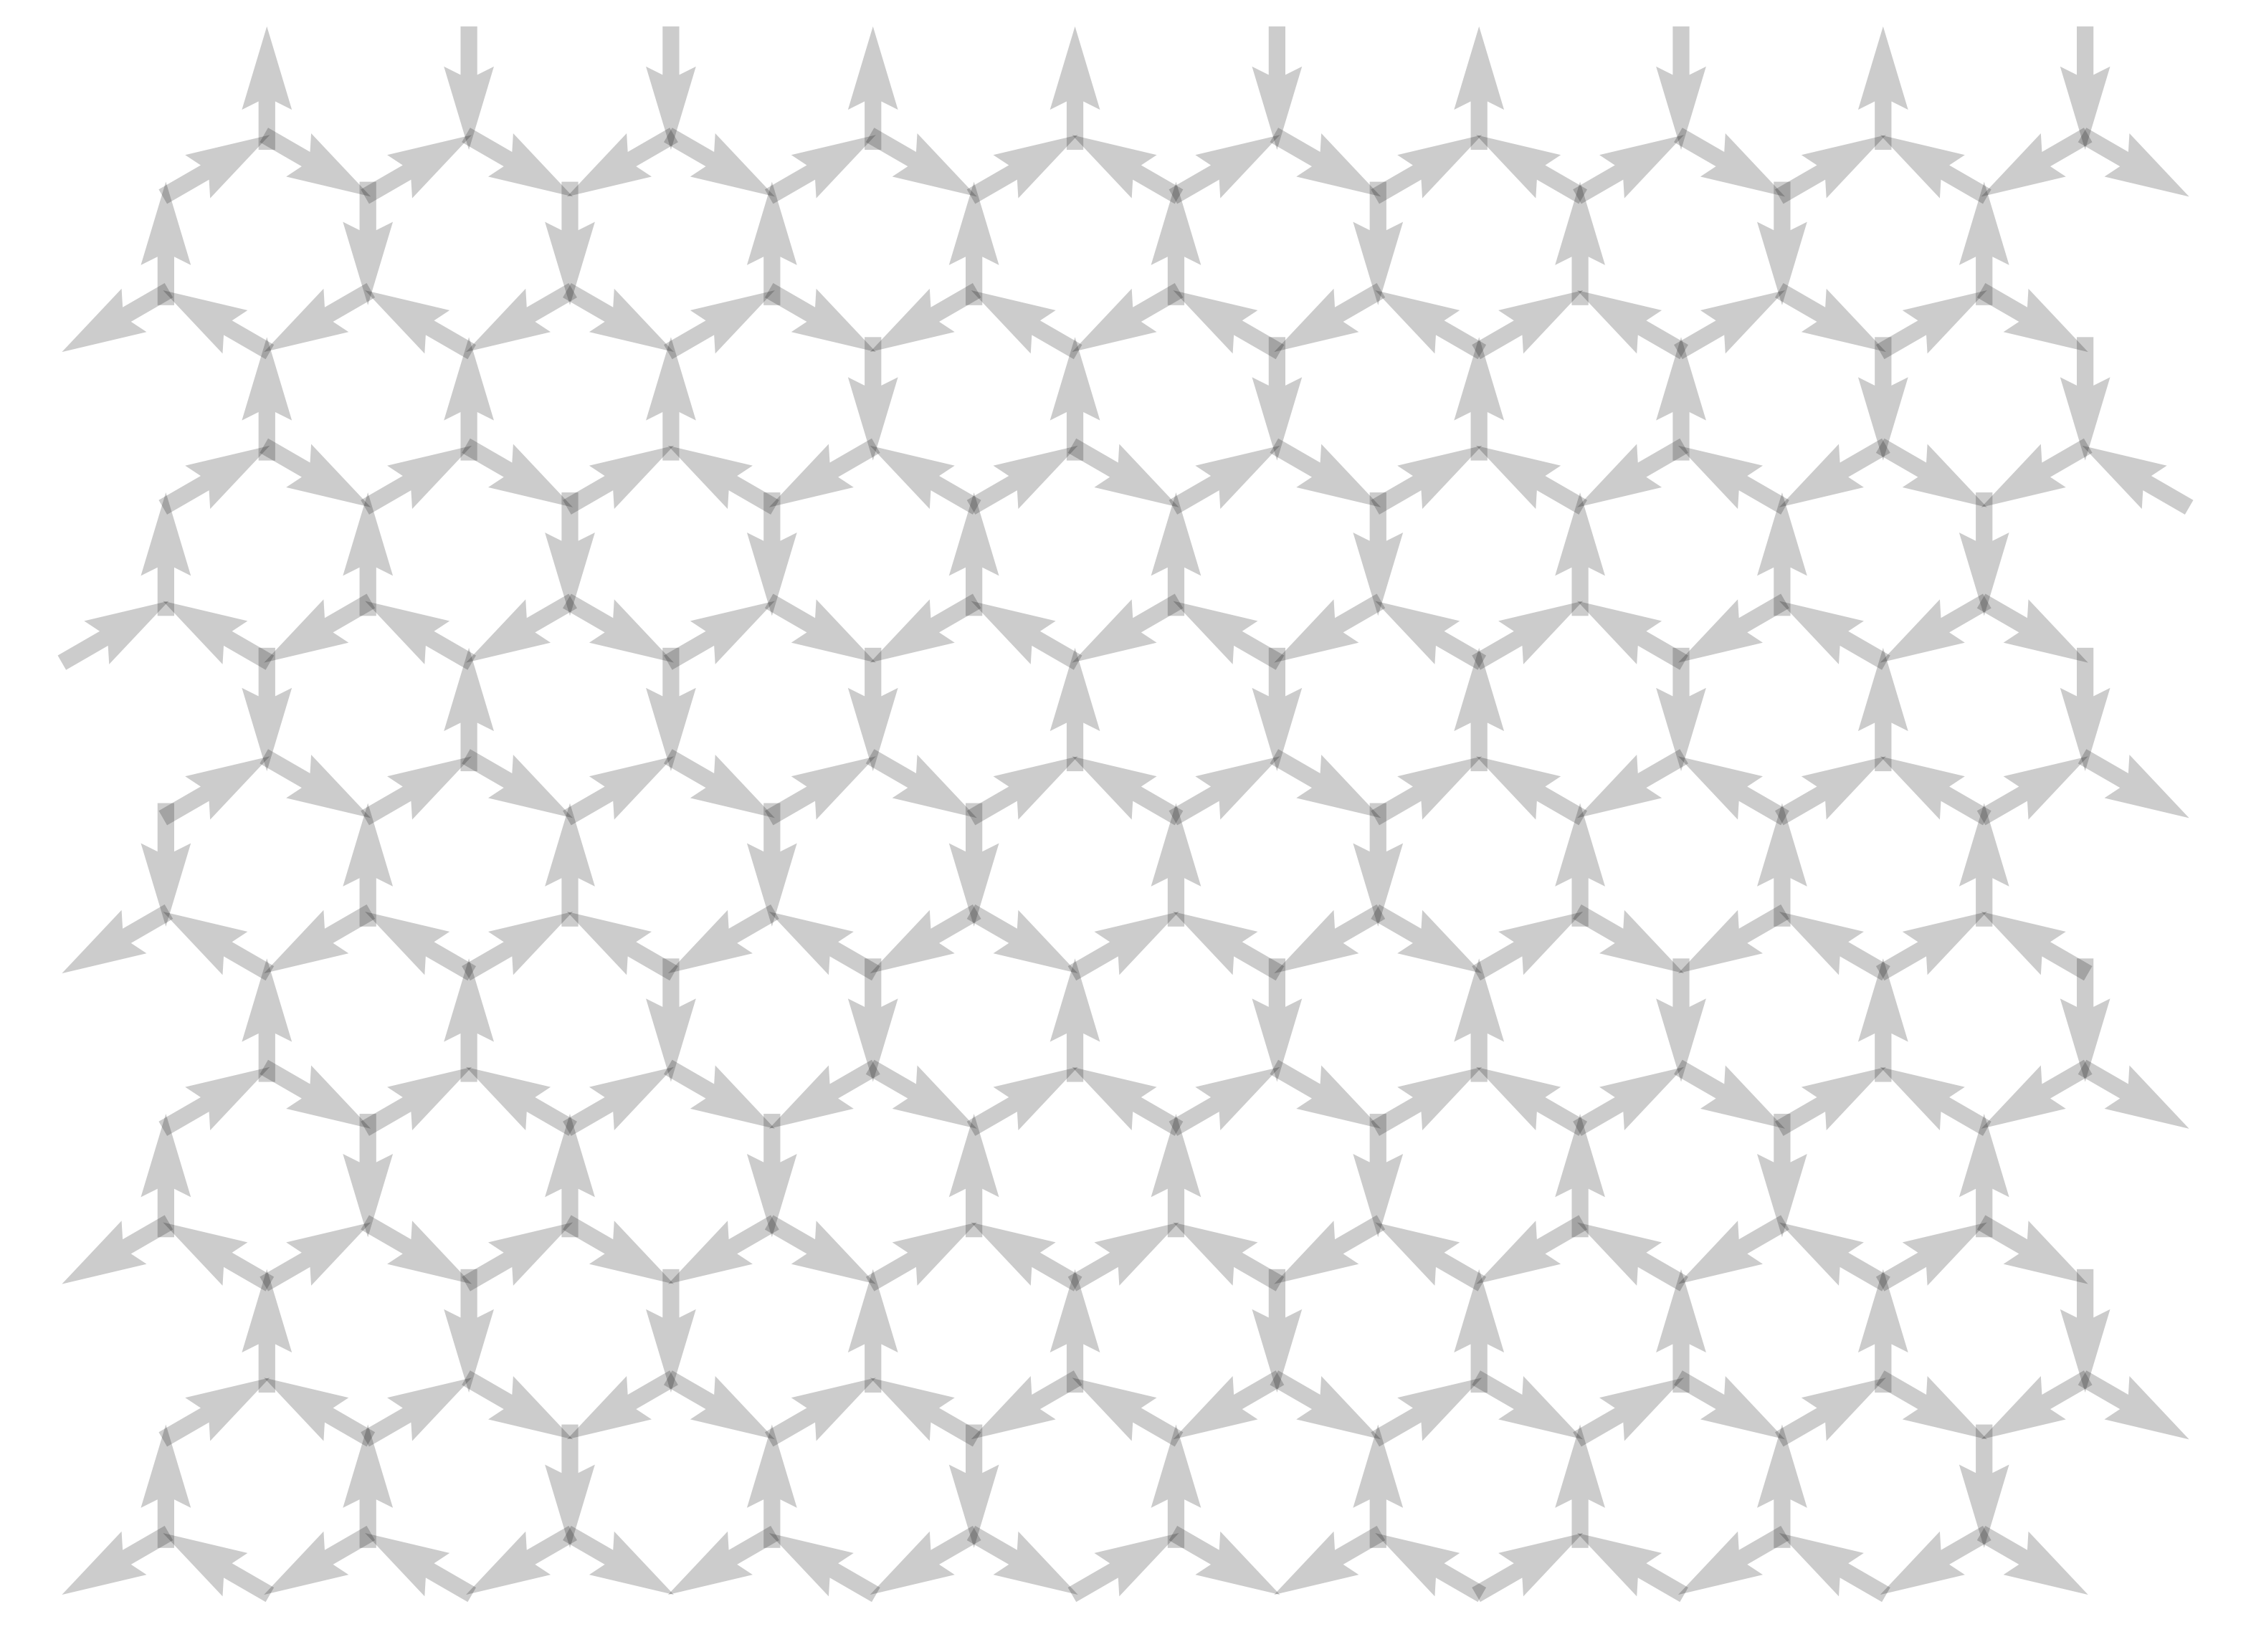

In [429]:
beta = 1./0.5

for i in range(10000*N_spin):
    j = np.random.randint(0,N_spin)
    dE = -2*S[j]*Bi[j]
    if (np.random.rand() < np.exp(-beta*dE)):
        update(j)
    
plt.figure(figsize=(20,15),dpi = 200)
#plt.box(False)
plt.axis('off')
for i in range(N_spin):
    plt.quiver(x[i],y[i],S[i]*mx[i],S[i]*my[i],pivot='middle',alpha=0.2)


In [430]:
Aij[0,2]

5.000014903930133

18.933034581604655

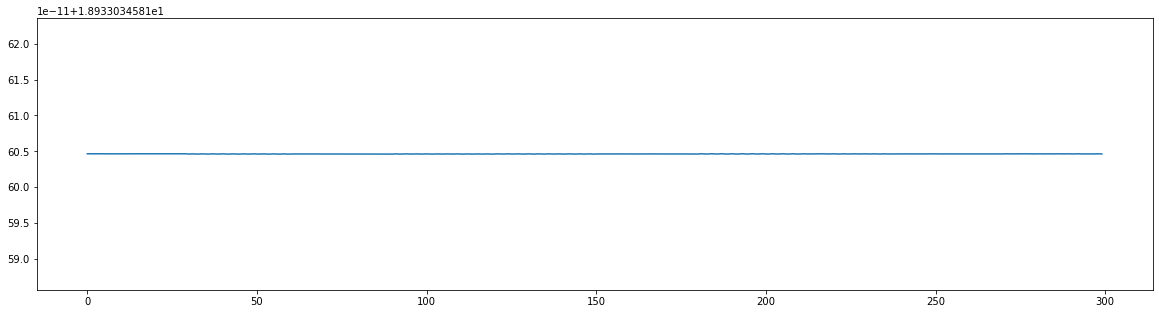

In [402]:
S = []
for i in range(N_spin):
    #S.append(np.random.choice([-1,1]))
    S.append(1)
E = np.zeros(N_spin)
#S[1] = -1
for i in range(N_spin):
    for j in range(N_spin):
        E[i] += S[j]*Aij[i,j]
    E[i] *= S[i]

plt.figure(figsize=(20,5))
plt.plot(E)
#plt.ylim (17.5,20)
E[0]

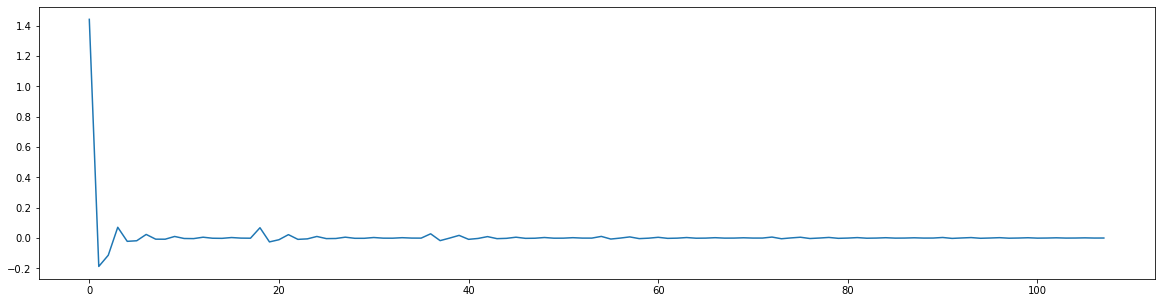

In [305]:
plt.figure(figsize=(20,5))
plt.plot(E)
#plt.ylim (-0.1,0.1)

In [388]:
Etot = 0.5*np.sum(E)/N_spin

In [389]:
Etot

9.467849084238033

In [390]:
E

array([18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93569817,
       18.93569817, 18.93569817, 18.93569817, 18.93569817, 18.93

In [282]:
for i in range(100):
    print(np.random.choice([-1,1]))

1
-1
-1
-1
-1
-1
1
1
-1
1
1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
1
-1
-1
1
-1
1
-1
-1
1
-1
1
-1
-1
-1
1
-1
-1
1
1
1
-1
1
-1
1
-1
1
-1
-1
1
1
1
-1
-1
1
1
1
-1
1
-1
-1
1
-1
-1
1
-1
1
1
-1
1
-1
-1
1
1
1
-1
1
1
1
-1
-1
-1
-1
1
-1
-1
-1
1
-1
1
-1
1


In [396]:
np.sum(Aij[i,:])

18.933034581604637

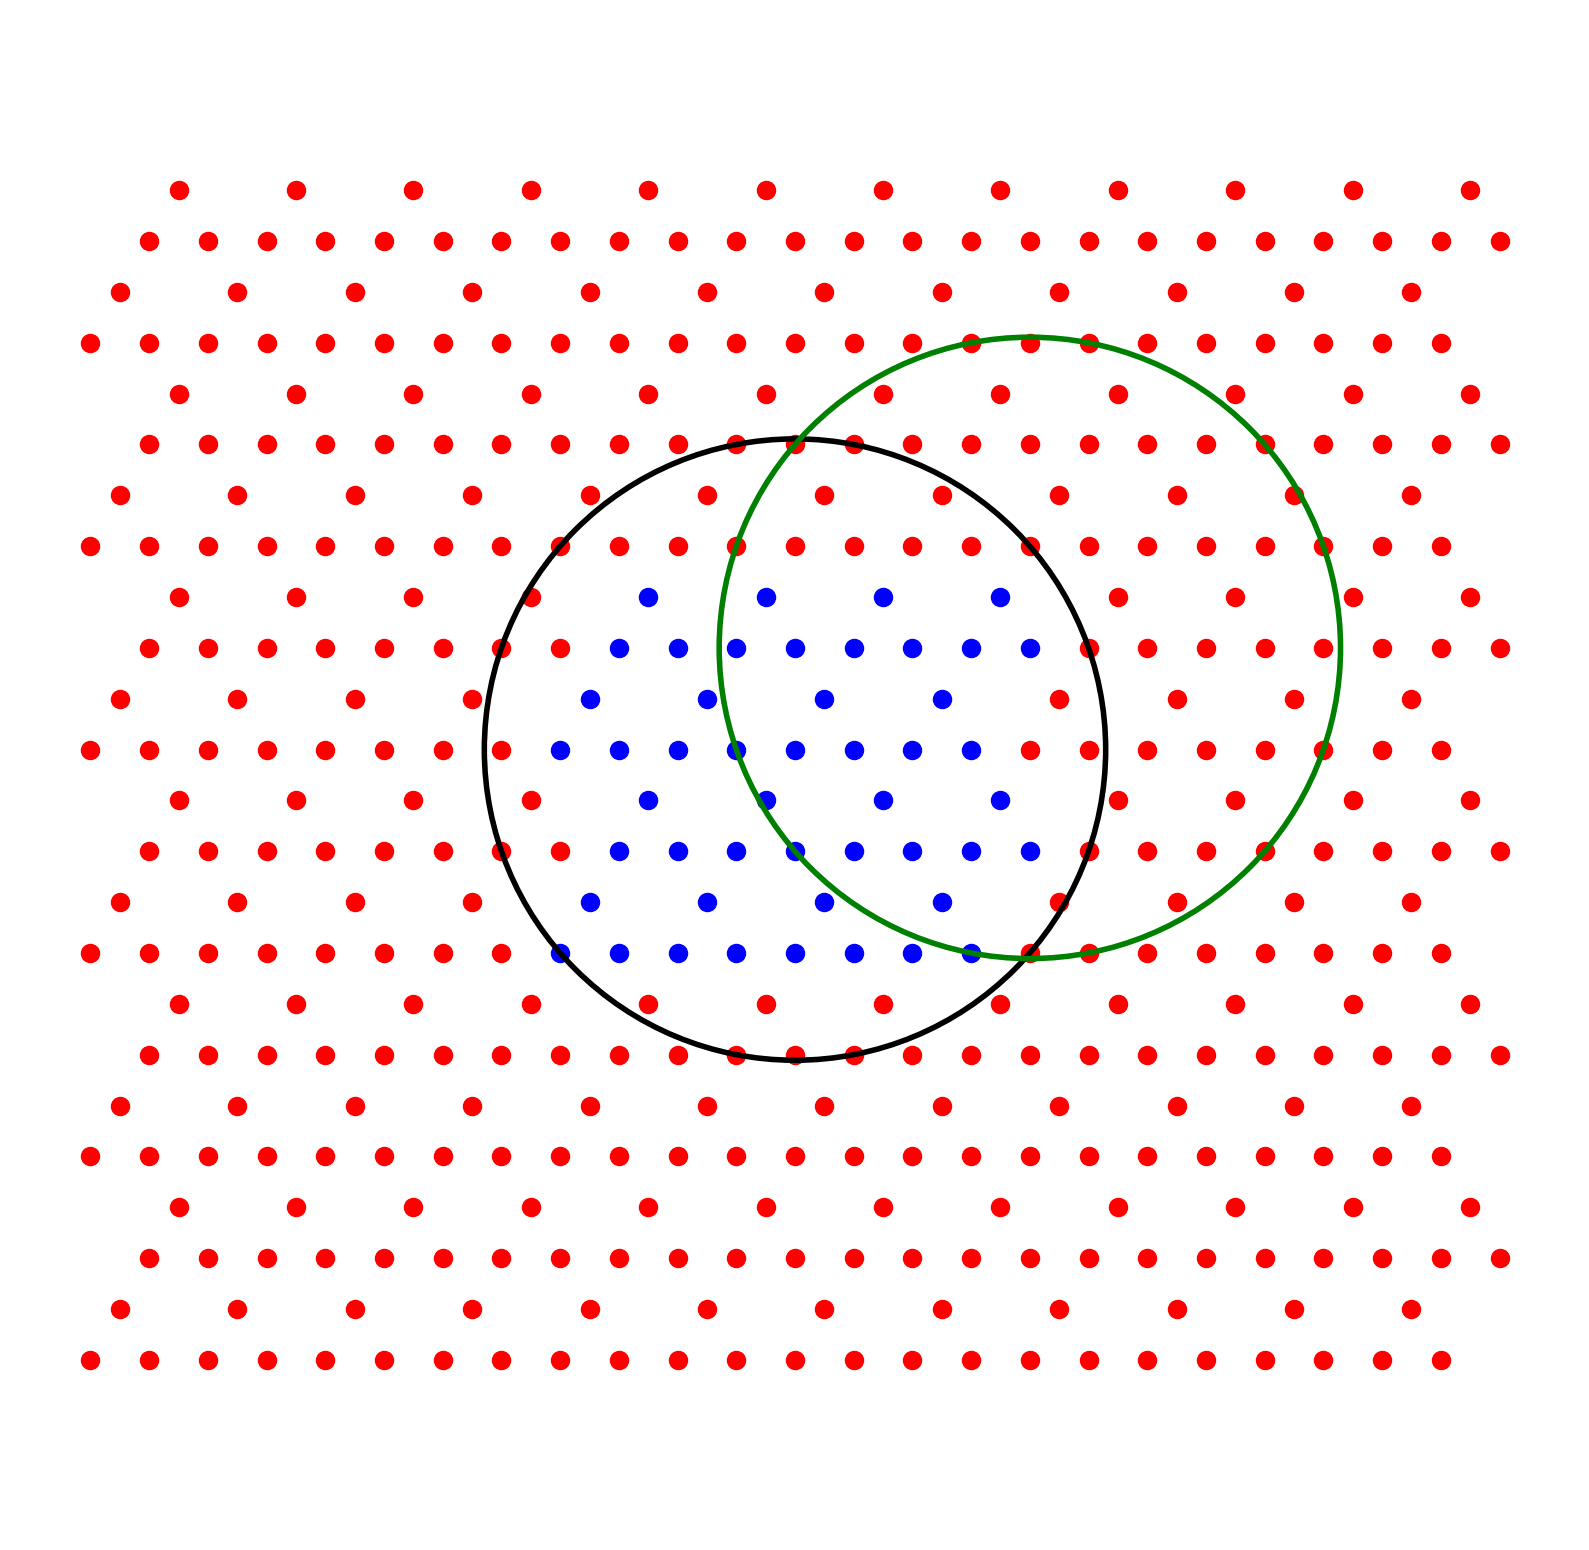

In [46]:
x = []
y = []
mx = []
my = []

nx = 4
ny = 4

ex,ey = spins(0.)

for j in range(ny):
    for i in range(nx):
        for k in range(3):
            x.append(x0[k]+2.*(i)+j%2)
            y.append(y0[k]+2.*np.sin(ang)*j)
            mx.append(ex[k])
            my.append(ey[k])


N_spin = np.size(x)
Aij = np.zeros([N_spin,N_spin])

Lx = max(x) - min(x)
Ly = max(y) - min(y) + np.sin(60.0*np.pi/180.0)

for i in range(N_spin):
    x[i] -= 0.5*Lx
    y[i] -= 0.5*Ly

rc = np.sqrt(Lx**2+Ly**2)

fig,ax = plt.subplots(figsize=(10,10),dpi = 200)


for i in range(N_spin):
    for nx in range(-1,2):
        for ny in range(-1,2):   

            if nx != 0 or ny != 0:
                #ax.quiver(x[i]+nx*Lx,y[i]+ny*Ly,mx[i],my[i],pivot='middle',color='r',alpha=0.5)
                plt.scatter(x[i]+nx*Lx,y[i]+ny*Ly,color='r')
            else:
                #ax.quiver(x[i]+nx*Lx,y[i]+ny*Ly,mx[i],my[i],pivot='middle',color='b',alpha=0.9)
                plt.scatter(x[i]+nx*Lx,y[i]+ny*Ly,color='b')
                    

C1 = plt.Circle((0.,0.),rc/2,color='black',fill=False,lw=2)
C2 = plt.Circle((x[-1],y[-1]),rc/2,color='g',fill=False,lw=2)
ax.add_patch(C1)
ax.add_patch(C2)
ax.axis('equal')
plt.axis(False)
plt.savefig("condicaodecontornp.pdf",dpi=300,bbox_inches='tight')